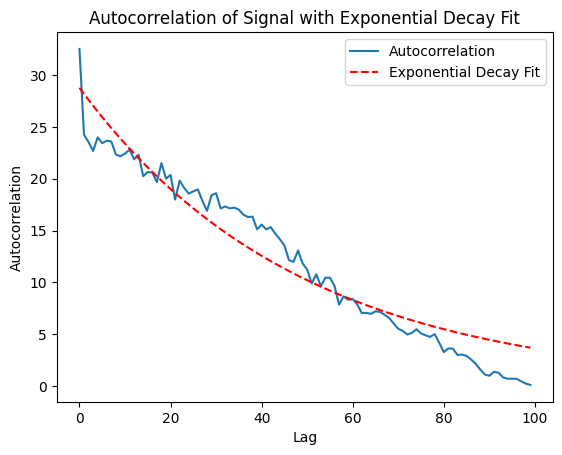

The time constant of the fitted exponential decay function is: 48.22620990596622


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def autocorr(x):
    """
    Compute autocorrelation function of signal x
    """
    corr = np.correlate(x, x, mode='full')
    return corr[len(corr)//2:]

# Generate some random signal
signal = np.random.rand(100)

# Compute autocorrelation function
autocorr_signal = autocorr(signal)

# Define an exponential decay function
def exponential_decay(t, A, tau):
    return A * np.exp(-t/tau)

# Fit the exponential decay function to the autocorrelation function
lags = np.arange(len(autocorr_signal))
popt, pcov = curve_fit(exponential_decay, lags, autocorr_signal)

# Extract the time constant from the fitted parameters
tau = popt[1]

# Plot the autocorrelation function and the fitted exponential decay function
plt.plot(lags, autocorr_signal, label='Autocorrelation')
plt.plot(lags, exponential_decay(lags, *popt), 'r--', label='Exponential Decay Fit')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Signal with Exponential Decay Fit')
plt.legend()
plt.show()

# Print the time constant
print('The time constant of the fitted exponential decay function is:', tau)


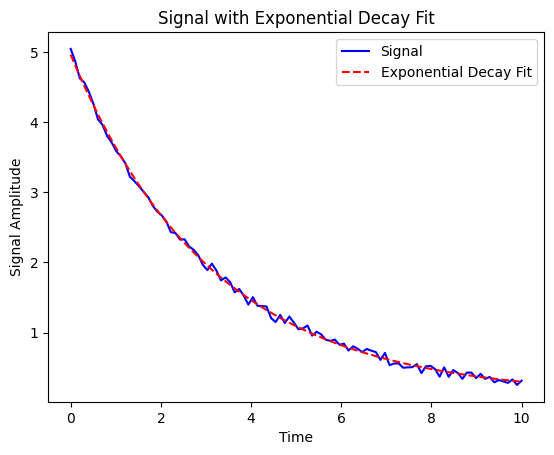

The fitted amplitude is: 4.866150964614802
The fitted time constant is: 3.150444438087182
The fitted constant offset is: 0.09505569149553952


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate some example data with multiple rise and decay sections
x = np.linspace(0, 10, num=100)
y = 0.5 * np.exp(-x/3) + 0.3 * np.exp(-(x-3)/2) + 0.7 * np.exp(-(x-6)/4) + np.random.normal(0, 0.05, size=100)

# Define an exponential decay function
def exponential_decay(x, A, tau, c):
    return A * np.exp(-x/tau) + c

# Fit the exponential decay function to the signal
popt, pcov = curve_fit(exponential_decay, x, y)

# Extract the fitted parameters
A, tau, c = popt

# Plot the signal and the fitted exponential decay function
plt.plot(x, y, 'b-', label='Signal')
plt.plot(x, exponential_decay(x, A, tau, c), 'r--', label='Exponential Decay Fit')
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Signal with Exponential Decay Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print('The fitted amplitude is:', A)
print('The fitted time constant is:', tau)
print('The fitted constant offset is:', c)
